In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

In [ ]:
# One hot enconding
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

In [ ]:
# Create X and y
y = insurance_one_hot['charges']
X = insurance_one_hot.drop('charges', axis=1)

In [ ]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
# Create a model
tf.random.set_seed(42)

# 1. Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,name='Hidden'),
    tf.keras.layers.Dense(1,name ='Output')
],name='Insurance_model')

# 2. Compile the model
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# 3. Fit the model
insurance_model.fit(X_train,y_train,epochs = 100, verbose=0)

#4. Visualize the model
plot_model(insurance_model,show_shapes = True)

In [ ]:
# 5. Check the results on the test data
insurance_model.evaluate(X_test,y_test)

In [ ]:
y_train.median(), y_train.mean(), y_train.std()

In [ ]:
# 6. Improving the model

tf.random.set_seed(42)

# Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,name='Hidden_1'),
    tf.keras.layers.Dense(100,name='Hidden_2'),
    tf.keras.layers.Dense(1,name='Output')
],'Insurance_model_2')

# Compile the model
insurance_model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

# Fit the model
history = insurance_model_2.fit(X_train,y_train, epochs=500)

# Visualize the model
plot_model(insurance_model_2,show_layer_names=True,show_shapes=True)


In [ ]:
# Check the results
insurance_model_2.evaluate(X_test,y_test)

In [ ]:
insurance_model.evaluate(X_test,y_test)

In [ ]:
# Visualize the loss of the model per epoch
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epoch")

 How long should I train for? -> EarlyStopping callback

### Preprossesing data (Normalization and Standardization)


In [ ]:
X

In [ ]:
X['age'].plot(kind='hist')

In [ ]:
X['bmi'].plot(kind='hist')

### Feature scaling
* Normalization = Keeps the original distribution of the data while setting the values in the range 0-1
* Standarization = 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import plot_model

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown="ignore"),['sex','smoker','region'])
    )

# Set the feature and variable data
X = insurance.drop('charges',axis=1)
y = insurance['charges']

# Set the training and test dataset
X_train,X_test, y_train, y_test = train_test_split(X,y,train_size=0.2)

# Fit the column transformer
ct.fit(X_train)

# Transform the feature dataset
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# Visualize the new dataset 
X_train_normal

In [ ]:
# Build a neural network model to fit the nomalized data
tf.random.set_seed(42)

# 1.Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)]
)

# 2. Compile the model
insurance_model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["mae"]
)

# 3. Fit the model
history = insurance_model_3.fit(X_train_normal,y_train,epochs = 100)

# Visualize the model
plot_model(insurance_model_3,show_shapes=True)

In [ ]:
insurance_model_3.evaluate(X_test_normal,y_test)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import plot_model

(X_train,y_train), (X_test,y_test)= tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2,seed=113)

In [22]:
X_train.shape, y_train.shape

((404, 13), (404,))

In [37]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


Epoch 1/100
13/13 [==============================] - 0s 5ms/step - loss: 26.7213 - mae: 26.7213 - mse: 1240.2712
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 14.3203 - mae: 14.3203 - mse: 324.0635
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 10.0862 - mae: 10.0862 - mse: 157.3774
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 9.3157 - mae: 9.3157 - mse: 138.9594
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 8.5783 - mae: 8.5783 - mse: 123.8023
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 8.5027 - mae: 8.5027 - mse: 121.2954
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 8.0629 - mae: 8.0629 - mse: 106.1388
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 7.3845 - mae: 7.3845 - mse: 95.9855
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 7.5923 - mae: 7.5923 - mse: 101.8369
Epoc

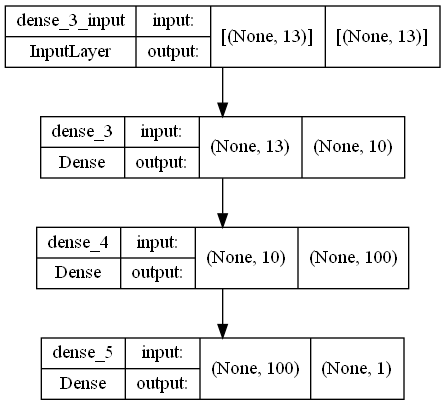

In [23]:
# Sin normalizacion
tf.random.set_seed(42)

# 1. Create the model
boston_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
boston_model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['mae','mse']
)
# 3. Fit the model
history_1 = boston_model_1.fit(X_train,y_train,epochs=100)
# 4. Visualize the model
plot_model(boston_model_1,show_shapes=True)

4/4 [==============================] - 0s 1ms/step - loss: 5.9968 - mae: 5.9968 - mse: 59.2350
[5.996804237365723, 5.996804237365723, 59.235015869140625]


Text(0.5, 0, 'Epoch')

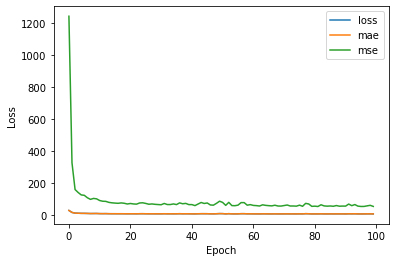

In [24]:
print(boston_model_1.evaluate(X_test,y_test))
pd.DataFrame(history_1.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epoch")

In [25]:
y_preds = boston_model_1.predict(X_test)

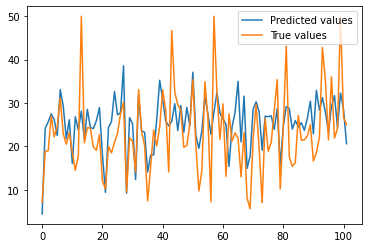

In [33]:
plt.plot(y_preds)
plt.plot(y_test)
plt.legend(['Predicted values','True values'])

In [38]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [43]:
# Design the transformer
scaler = MinMaxScaler()

# Fit the transformer
scaler.fit(X_train)

X_train_normal = scaler.transform(X_train)
X_test_normal = scaler.transform(X_test)


Epoch 1/100
13/13 [==============================] - 0s 3ms/step - loss: 21.5792 - mae: 21.5792
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 20.5054 - mae: 20.5054
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 18.9465 - mae: 18.9465
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 16.5553 - mae: 16.5553
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 13.1531 - mae: 13.1531
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 10.0678 - mae: 10.0678
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 8.6063 - mae: 8.6063
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 8.1010 - mae: 8.1010
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 7.6426 - mae: 7.6426
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 7.2202 - mae: 7.2202
Epoch 11/100
13/13 [===========================

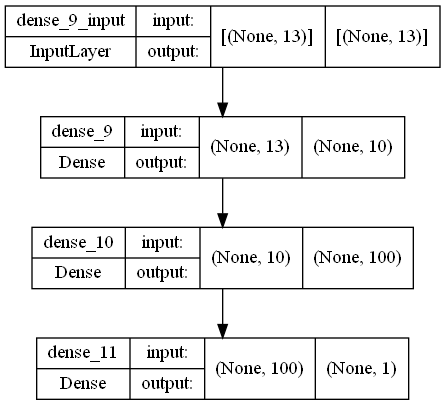

In [46]:
tf.random.set_seed(42)

# 1. Create the model
boston_model_1_normal = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
boston_model_1_normal.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

# 3. Fit the model
history_2 = boston_model_1_normal.fit(X_train_normal,y_train,epochs=100)

# 4. Visualize the model
plot_model(boston_model_1_normal,show_shapes=True)

4/4 [==============================] - 0s 2ms/step - loss: 3.1840 - mae: 3.1840
[3.1840460300445557, 3.1840460300445557]


Text(0.5, 0, 'Epoch')

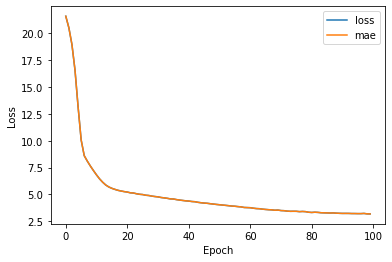

In [49]:
print(boston_model_1_normal.evaluate(X_test_normal,y_test))
pd.DataFrame(history_2.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epoch")

In [50]:
y_preds_normal = boston_model_1_normal.predict(X_test_normal)

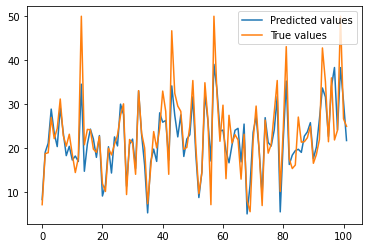

In [51]:
plt.plot(y_preds_normal)
plt.plot(y_test)
plt.legend(['Predicted values','True values'])